# Model Testing


* Logistic Regression
* Decision Trees
* SVM

Most important scoring metric: 
* want to avoid false positives
* but also want to avoid false negatives
* f1 score

(*Remember in the presentation to explain what scores that aren't accuracy mean. Show Helen your slides on Monday*)

In [5]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#import seaborn as sns

pd.set_option('display.max_columns', None)
plt.rcParams['figure.facecolor']='w'

import warnings
warnings.filterwarnings('ignore')

In [6]:
#set up train and test

test = pd.read_csv('data/test.csv')
train = pd.read_csv('data/train.csv')

In [7]:
from sklearn.model_selection import train_test_split

In [22]:
X_test = test.drop(columns = 'loan_status')
y_test = test.loan_status

X = train.drop(columns = 'loan_status')
y = train.loan_status

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2, random_state = 42)

## Logistic Regression

In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [67]:
#first passthrough

stanscaler = StandardScaler()

X_train_scaled = stanscaler.fit_transform(X_train)
X_val_scaled = stanscaler.transform(X_val)
X_test_scaled = stanscaler.transform(X_test)

In [68]:
pca = PCA(n_components = 3)

X_train_pca = pca.fit_transform(X_train_scaled)
X_val_pca = pca.transform(X_val_scaled)
X_test_pca = pca.transform(X_test_scaled)

In [54]:
logmodel = LogisticRegression()

logmodel.fit(X_train_pca, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [55]:
logmodel.score(X_val_pca, y_val)

0.8715596330275229

Text(0.5, 1.0, 'Scree Plot')

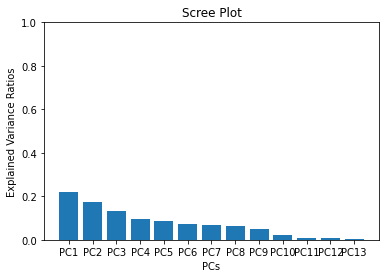

In [47]:
#setting PCA params

plt.bar(['PC'+str(num) for num in range(1, pca.n_components_+1)],
        pca.explained_variance_ratio_)

plt.xlabel('PCs')
plt.ylabel('Explained Variance Ratios')

plt.ylim(0,1)

plt.title('Scree Plot')

In [16]:
from sklearn.model_selection import GridSearchCV

In [17]:
params = {
    'clf__C': list(range(1,10)),
    'clf__solver': ['liblinear', 'lbfgs', 'newton-dg','sag','saga'],
    'clf__penalty': ['l1','l2','elasticnet','none']
}

In [19]:
from sklearn.pipeline import Pipeline

In [48]:
log_pipeline = Pipeline([('scaler', StandardScaler()),
                        ('pca', PCA(n_components = 3)),
                        ('clf', LogisticRegression())])

In [49]:

gridsearch_log = GridSearchCV(log_pipeline,
                             params,
                             scoring = 'f1',
                             cv = 5,
                             n_jobs = -1)

In [50]:
gridsearch_log.fit(X, y)

GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('scaler',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('pca',
                                        PCA(copy=True, iterated_power='auto',
                                            n_components=3, random_state=None,
                                            svd_solver='auto', tol=0.0,
                                            whiten=False)),
                                       ('clf',
                                        LogisticRegression(C=1.0,
                                                           class_weight=None,
                                                           dual=False,
                                                           fit

In [51]:
gridsearch_log.best_score_

0.941747572815534

In [52]:
gridsearch_log.best_params_

{'clf__C': 1, 'clf__penalty': 'l1', 'clf__solver': 'liblinear'}

In [56]:
best_logmodel = LogisticRegression(C = 1, penalty = 'l1', solver = 'liblinear')

In [57]:
best_logmodel.fit(X_train_pca, y_train)

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l1',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [58]:
best_logmodel.score(X_val_pca, y_val)

0.8715596330275229

In [70]:
y_train_pred = best_logmodel.predict(X_train_pca)
y_val_pred = best_logmodel.predict(X_val_pca)
y_test_pred = best_logmodel.predict(X_test_pca)

In [74]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
from sklearn.metrics import recall_score, precision_score, f1_score

In [73]:
recall_score(y_val, y_val_pred), recall_score(y_test, y_test_pred)

#why are these scores so good???

(1.0, 1.0)

In [75]:
precision_score(y_val, y_val_pred), precision_score(y_test, y_test_pred)

(0.8715596330275229, 0.8832116788321168)

In [76]:
f1_score(y_val, y_val_pred), f1_score(y_test, y_test_pred)

(0.9313725490196079, 0.937984496124031)

Text(0.5, 1.0, 'Confusion Matrix for PCA Validation Data')

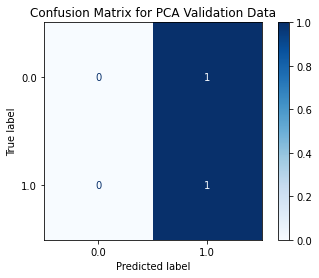

In [80]:
plot_confusion_matrix(best_logmodel, 
                      X_train_pca,
                      y_train,
                      cmap= 'Blues', 
                      normalize = 'true')
plt.title('Confusion Matrix for PCA Validation Data')

## Decision Trees

In [7]:
from sklearn.tree import DecisionTreeClassifier